In [294]:
import math
import random
from scipy.integrate import quad

In [295]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Task 1 - Using a function to calculate area of a unit circle (using trapezoidal method)

In [296]:
def semi_circle(x):
    return math.sqrt(abs(1-x*x))

In [297]:
def trap_int(f, a, b, n):
    interval = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(n):
        s += f(a + i*interval)
    s += f(b)/2.0
    return s * interval

In [298]:
area = trap_int(lambda x:semi_circle(x), -1, 1, 100)
print ("Area of a unit circle will be " + str(area*2))

Area of a unit circle will be 3.1382685110984996


Area using scipy.integrate

In [299]:
area1 = quad(lambda x:semi_circle(x), -1, 1)
print ("Area of a unit circle will be " + str(area1[0]*2))

Area of a unit circle will be 3.1415926535897967


Task 2 - Area of a unit circle using adaptive grid method

In [300]:
def adaptive_integration(f, a, b, eps, n):
    limit = 100000  
    a1 = trap_int(f, a, b, n)
    a2 = trap_int(f, a, b, 2*n)
    diff = abs(a1 - a2)

    while (diff > eps) and (n < limit):
        a1 = trap_int(f, a, b, n)
        a2 = trap_int(f, a, b, 2*n)
        diff = abs(a1 - a2)
        n *= 2
        
    if diff <= eps:
        print ("The integral for given function computes to: " + str(a2))
        return a2  

In [301]:
area = adaptive_integration(lambda x:semi_circle(x), -1, 1, 0.001, 200)
print ("Area of a unit circle will be " + str(area*2))

The integral for given function computes to: 1.5705884724197643
Area of a unit circle will be 3.1411769448395286


In [302]:
def derivative_circle(x):
    return(-1*x)/(math.sqrt(1-x*x))

In [303]:
def AdaptiveGrid(f, der, a, b, n,eps):
    h = (b-a)/n
    x = np.linspace(a, b, n)
    
    area = 0
    dist_x = 0
    k = 1
    v1 = x[1]
    
    for i in range(1, len(x)-1):
        v2 = x[i]
        if (abs( abs(der(v1))-abs(der(v2)) ) < eps):
            dist_x += h
            k += 1
            
        else :
            area += f((v2 + v1)/k)*dist_x
            v1 = x[i+1]
            count = 1
    return area

In [304]:
AdaptiveGrid(semi_circle,derivative_circle, -1, 1, 100, 1)/(pi/2)

3.832616859959694

 Task 3 - Compute the area of the quarter unit circle (1st quadrant) using simple Monte Carlo method

Enter the total number of points: 10000
Enter the radius of the circle: 1
The area of the circle is: 3.1448
The area of quarter circle is: 0.7862


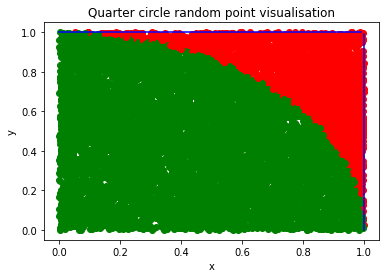

In [74]:
in_pt = 0
i=1
n=int(input("Enter the total number of points: "))
s=int(input("Enter the radius of the circle: "))
while (i<=n):
  x = random.random()
  y = random.random()
  if ((x**2)+(y**2))<=1:
    in_pt+=1
    plt.plot(x , y , 'go')
  else:
    plt.plot(x , y , 'ro')
  i+=1
area=(in_pt)/n

print ("The area of the circle is: ", end="")
print(area*(s*2)*(s*2))
print ("The area of quarter circle is: ", end="")
print(area)

horiz = np.array(range(100))/100.0
y_1 = np.ones(100)
plt.plot(horiz , y_1, 'b')
vert = np.array(range(100))/100.0
x_1 = np.ones(100)
plt.plot(x_1 , vert, 'b')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Quarter circle random point visualisation')
plt.show()

In [89]:
def simple_mc_circle (n1,r):
    in_pt = 0
    i=1
    while (i<=n1):
        x = random.random()
        y = random.random()
        
        if ((x**2)+(y**2))<=1:
            in_pt+=1
        i+=1
    return(in_pt)/n1

In [95]:
n = 100

n_val = []
n_area = []
n_val = np.linspace(1,n,n)
for i in n_val :
    n_area.append(simple_mc_circle(n,1))

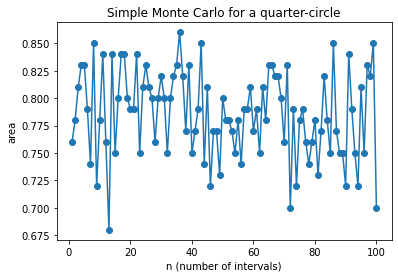

In [97]:
plt.plot(n_val,n_area, "o-")
plt.title('Simple Monte Carlo for a quarter-circle')
plt.xlabel('n (number of intervals)')
plt.ylabel('area')
plt.show()

Task 4.1 - Compute area of circle with  𝜌(𝑥)=constant

In [120]:
def MonteCarlo_const(f,a,b,num):
    
    sum = 0.0
    for i in range(num):
        x = np.random.uniform()*(b-a)
        x += a
        sum += f(x)
    
    return sum*(b-a)/num

In [121]:
area = MonteCarlo_const(semi_circle,-1,1,500)
print ("The area of the circle is: ", end="")
print(area*2)

The area of the circle is: 3.1730406900207493


Task 4.2 - Compute the are of the circle with  𝜌(𝑥)  being the Gaussian distribution (i.e. normal distribution)

In [209]:
def MonteCarloIntegration(f, a, b, num,v1,v2):
    sum = 0.0
    for i in range(num):
        x = np.random.normal(0,1) 
        if not(x<b and x>a) :
            continue
        sum += float(f(x)/gauss(x,v1,v2))
    
    return sum/num

In [210]:
def gauss(x,v1,v2):
    return (1/math.sqrt(2*pi))*math.exp((-(v1-x)*(v1-x)/(2*v2)))

In [219]:
area = MonteCarloIntegration(semi_circle,-1,1, 1000,0,1)
print ("The area of the semi circle is: ", end="")
print(area)
print ("The area of the unit circle is: ", end="")
print(area*2)

The area of the semi circle is: 1.5843161192877597
The area of the unit circle is: 3.1686322385755195
